In [232]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
%matplotlib inline
from sklearn import linear_model
import pylab
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt

In [75]:
def getDirList():
    directory_list = list()
    for root, dirs, files in os.walk("states_data/states_data/", topdown=False):
        for name in dirs:
            directory_list.append(os.path.join(root, name)+'/clean.txt')
    return directory_list

In [76]:
def getDataFrame(directory):
    state = directory.split("/")[2].lower()
    print "State = ",state
    df = pd.read_table(directory,error_bad_lines=False, low_memory=False,index_col=None,warn_bad_lines=False)
    num_columns = len(df.columns)
    if num_columns == 5:
        df.drop([df.columns[0],df.columns[1],df.columns[4]], axis=1, inplace=True)
    elif num_columns == 7:
        df.drop([df.columns[0],df.columns[1],df.columns[3],df.columns[4],df.columns[6]], axis=1, inplace=True)
    elif num_columns == 9:
        df.drop([df.columns[0],df.columns[1],df.columns[3],df.columns[4],df.columns[5],df.columns[6],df.columns[8]], axis=1, inplace=True)
    elif num_columns == 11:
        df.drop([df.columns[0],df.columns[1],df.columns[3],df.columns[4],df.columns[5],df.columns[6],df.columns[8],df.columns[9],df.columns[10]], axis=1, inplace=True)
    df.columns = ['date', 'val']
    df.val = pd.to_numeric(df.val,errors='coerce')
    df['val'].fillna(df['val'].median(), inplace=True)
    sf = df.groupby('date')['val'].mean()
    df_month = pd.DataFrame({'date':sf.index, 'val':sf.values})
    df_month['date'] = pd.to_datetime(df_month['date'])
    return df_month

In [77]:
def divideDataFrame(df):
    split = 0.7 #train percent
    train = df.iloc[:int(split*len(df))]
    test = df[int(split*len(df)):]
    return train,test

In [78]:
def getTrainTestArray(df):
    nFeat = 10
    X = np.array(df['val'])
    resX = np.zeros((nFeat), dtype=np.float)
    resY = np.zeros((1), dtype = np.float)
    for i in range(nFeat,len(X)-nFeat):
        row = X[i-nFeat:i]
        resX = np.vstack([resX, row])
        resY= np.vstack([resY, X[i+nFeat]])
    return resX, resY

#### Lasso Regressor

In [427]:
def getLassoClassifier(X,Y):
    clf = linear_model.Lasso(alpha=0.1)
    clf.fit(X,Y)
    return clf

#### Random Forest Regressor

In [449]:
def getRandomForestClassifier(X,Y):
    regr = RandomForestRegressor(max_depth=3, random_state=0) #model = forest.fit(train_fold, train_y.values.ravel())
    regr.fit(X, Y.ravel())
    return regr

#### SVM Regressor

In [450]:
def getSVMClassifier(X,Y):
    clf = SVR(C=1.0, epsilon=0.2)
    clf.fit(X, Y)
    return clf

In [451]:
def predict(clf, X):
    return clf.predict(X)

### Plotting the model 

In [467]:
def plot(testY,predY_lasso, lab):
    plt.figure(figsize=(8, 3))
    x = np.arange(len(testY))
    pylab.xlabel("Number of Days")
    pylab.ylabel("Water level in Feet")
    pylab.plot(x,testY,'-b', label = 'orig')
    pylab.plot(x,predY_lasso,'-g', label = lab)
    pylab.legend(loc = 'upper left')
    plt.plot()
    plt.show()

In [468]:
def getXtick(lis):
    res = list()
    for i in lis:
        print "i type = ",type(i)
        ts = pd.to_datetime(i)
        print "ts type = ",type(ts)
        d = ts.strptime('%Y-%m-%d').date()
        print "d type = ",type(d)
        res.append(d)
    return res

In [469]:
def analyzeOneState(num):
    dir_list = getDirList()
    df = getDataFrame(dir_list[num])
    traindf, testdf = divideDataFrame(df)
    trainX, trainY = getTrainTestArray(traindf)
    testX, testY = getTrainTestArray(testdf)
    lassoClf = getLassoClassifier(trainX, trainY)
    rfClf = getRandomForestClassifier(trainX, trainY)
    svmClf = getSVMClassifier(trainX, trainY)
    predY_svm = predict(svmClf, testX)
    predY_randomforest = predict(rfClf, np.array(testX))
    predY_lasso = predict(lassoClf, testX)
    print "Lasso Regression\nRMSE Lasso = ", sqrt(mean_squared_error(testY, predY_lasso))
    plot(testY, predY_lasso, 'Lasso')
    print "SVM Regression\nRMSE SVM = ", sqrt(mean_squared_error(testY, predY_svm))
    plot(testY, predY_svm, 'SVM')
    print "RF Regressor\nRMSE RF = ", sqrt(mean_squared_error(testY, predY_randomforest))
    plot(testY, predY_randomforest,"RF")

State =  alaska
Lasso Regression
RMSE Lasso =  0.438294509014


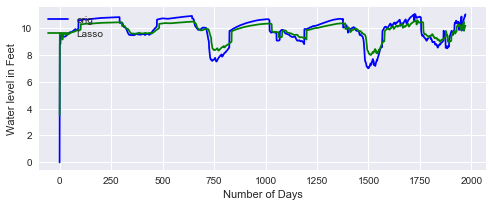

SVM Regression
RMSE SVM =  0.394406481985


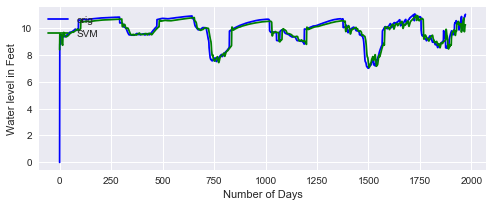

RF Regressor
RMSE RF =  0.40969279024


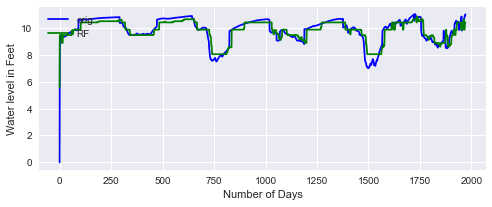

In [470]:
analyzeOneState(1)

State =  new hampshire
Lasso Regression
RMSE Lasso =  0.807758635691


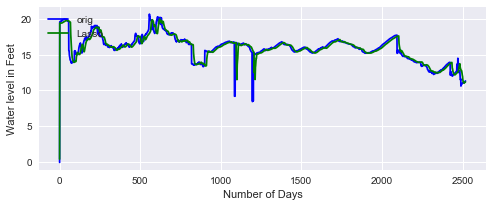

SVM Regression
RMSE SVM =  0.982404233709


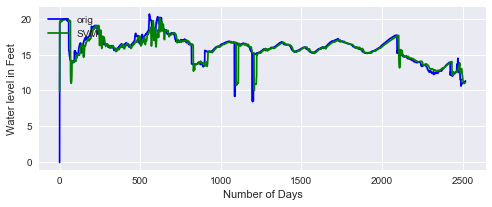

RF Regressor
RMSE RF =  1.13349683537


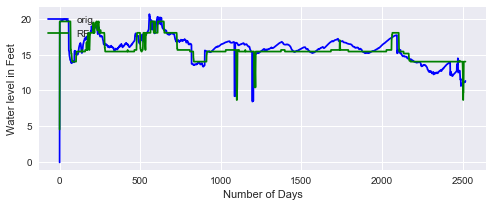

In [471]:
analyzeOneState(2)

State =  massachussets
Lasso Regression
RMSE Lasso =  0.887574305914


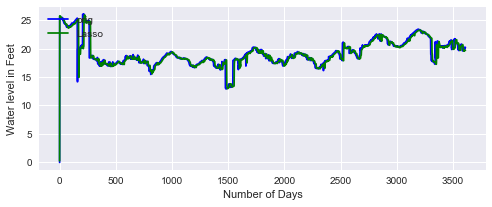

SVM Regression
RMSE SVM =  1.01355007395


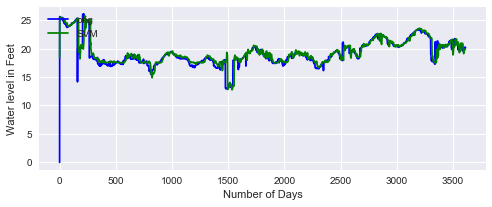

RF Regressor
RMSE RF =  1.31183706944


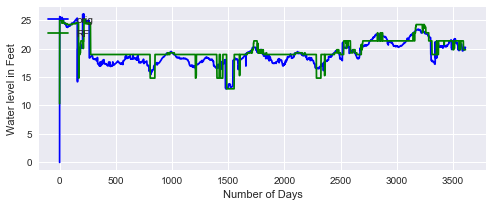

In [473]:
analyzeOneState(33)

State =  louisiana
Lasso Regression
RMSE Lasso =  4.87619822482


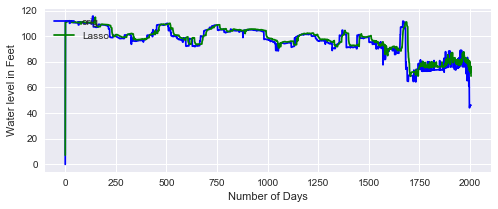

SVM Regression
RMSE SVM =  18.7903162114


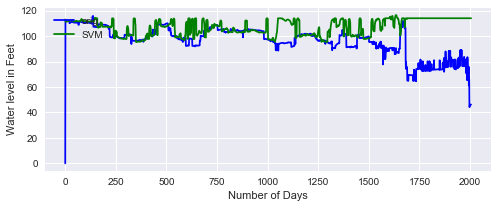

RF Regressor
RMSE RF =  11.7861781616


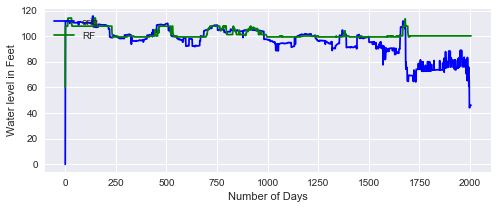

In [475]:
analyzeOneState(35)

State =  washington
Lasso Regression
RMSE Lasso =  1.68679576404


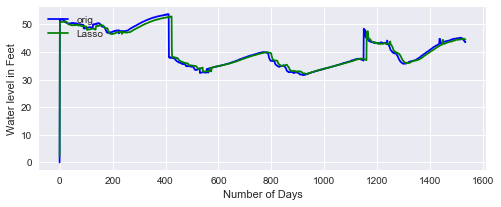

SVM Regression
RMSE SVM =  2.40117979969


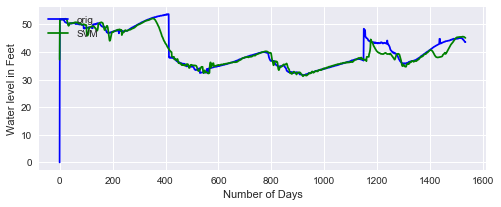

RF Regressor
RMSE RF =  2.34584525699


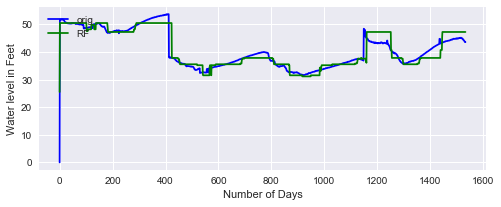

In [478]:
analyzeOneState(6)

State =  south dakota
Lasso Regression
RMSE Lasso =  2.97475525254


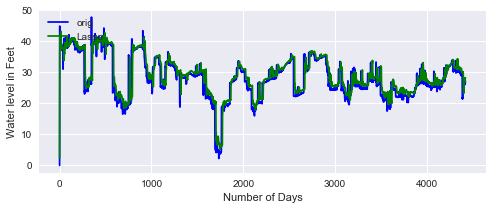

SVM Regression
RMSE SVM =  7.35298030162


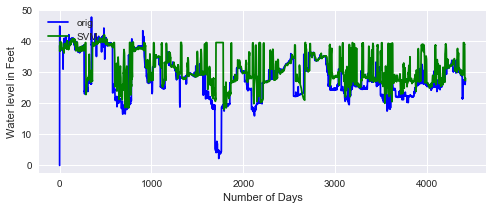

RF Regressor
RMSE RF =  4.10723882891


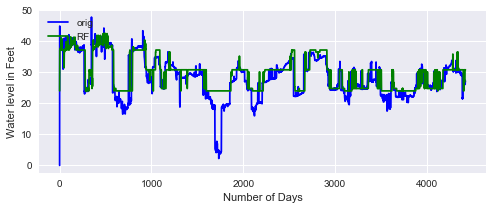

In [479]:
analyzeOneState(8)

State =  georgia
Lasso Regression
RMSE Lasso =  1.23430881979


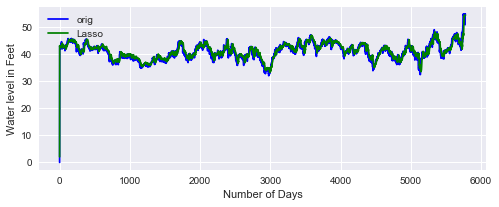

SVM Regression
RMSE SVM =  1.56471392346


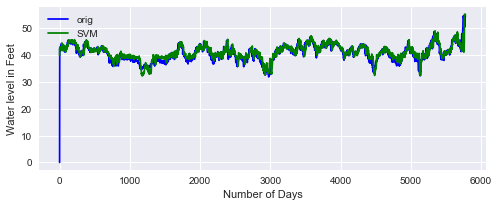

RF Regressor
RMSE RF =  1.43750051223


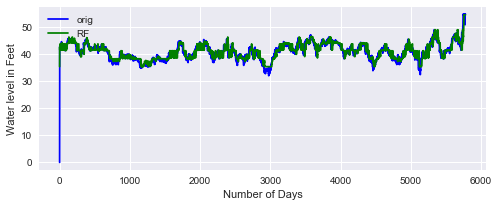

In [480]:
analyzeOneState(9)

State =  connecticut
Lasso Regression
RMSE Lasso =  1.33982388965


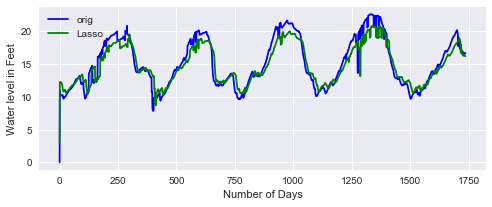

SVM Regression
RMSE SVM =  1.42830137485


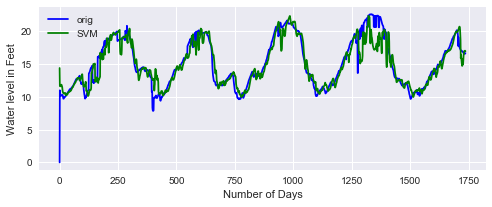

RF Regressor
RMSE RF =  1.45232042595


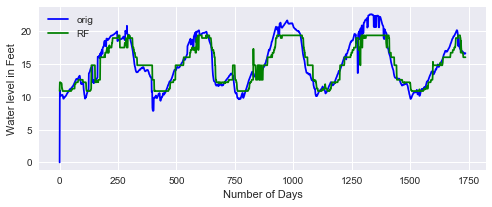

In [481]:
analyzeOneState(10)

State =  alabama
Lasso Regression
RMSE Lasso =  1.28834542831


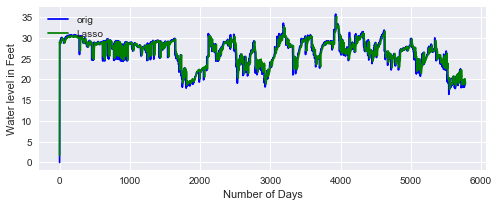

SVM Regression
RMSE SVM =  3.08329593787


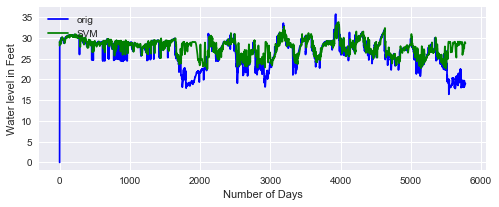

RF Regressor
RMSE RF =  1.60197962095


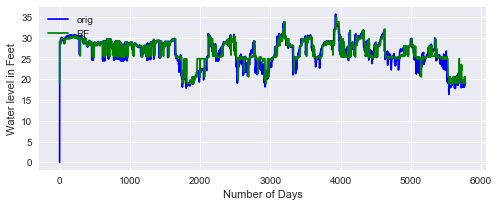

In [482]:
analyzeOneState(11)

State =  colorado
Lasso Regression
RMSE Lasso =  10.8992011327


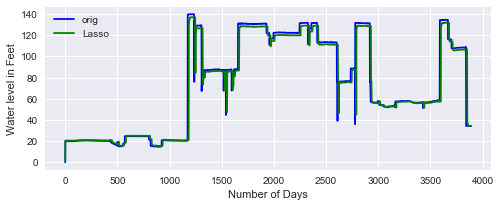

SVM Regression
RMSE SVM =  47.1560232221


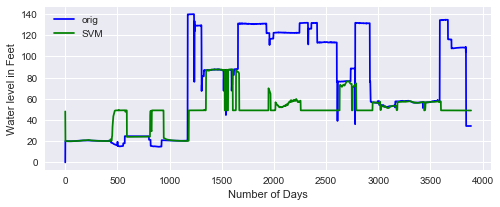

RF Regressor
RMSE RF =  13.8879461273


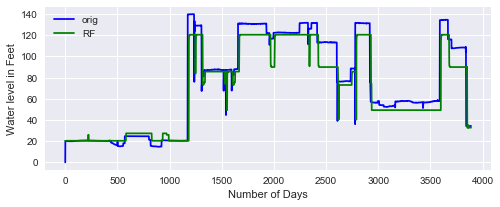

State =  ohio
Lasso Regression
RMSE Lasso =  1.71658204021


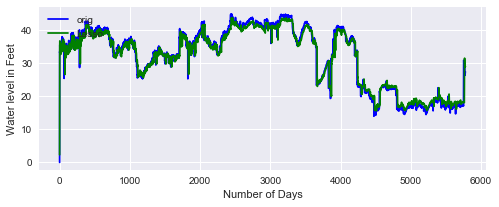

SVM Regression
RMSE SVM =  4.12847853716


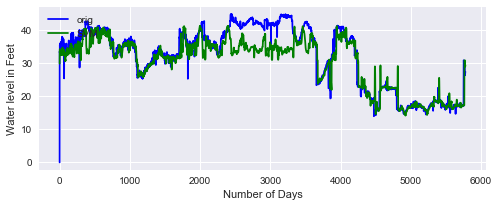

RF Regressor
RMSE RF =  6.48133833794


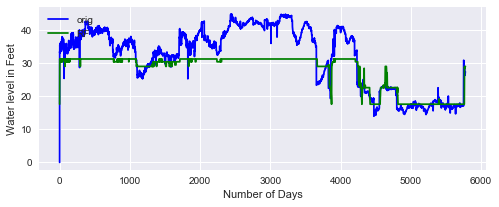

In [483]:
analyzeOneState(13)
analyzeOneState(14)

State =  maine
Lasso Regression
RMSE Lasso =  0.675531322851


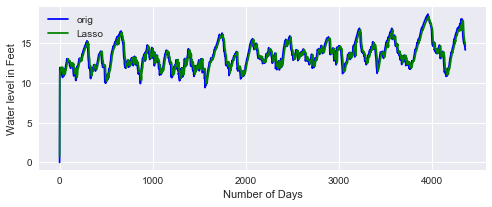

SVM Regression
RMSE SVM =  0.722138749339


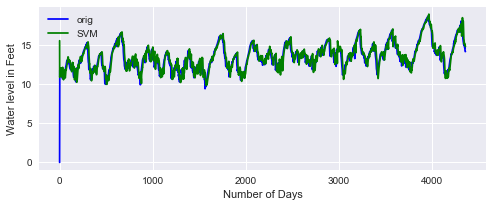

RF Regressor
RMSE RF =  0.816947680997


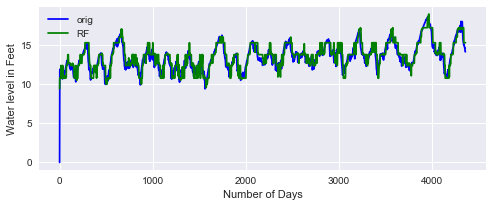

In [484]:
analyzeOneState(15)

State =  south carolina
Lasso Regression
RMSE Lasso =  8.99097074057


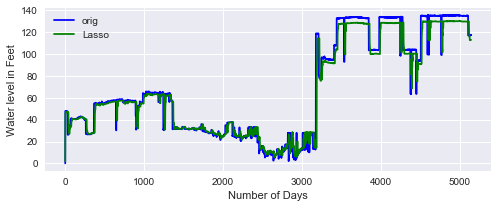

SVM Regression
RMSE SVM =  56.2308701433


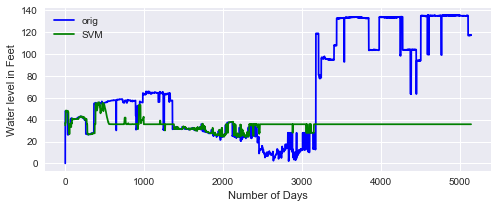

RF Regressor
RMSE RF =  45.676372844


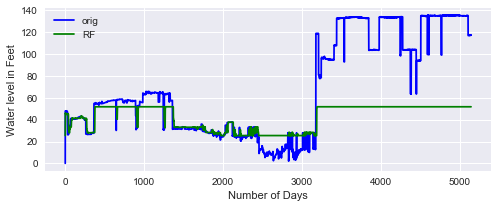

In [485]:
analyzeOneState(17)

State =  delaware
Lasso Regression
RMSE Lasso =  0.697809518735


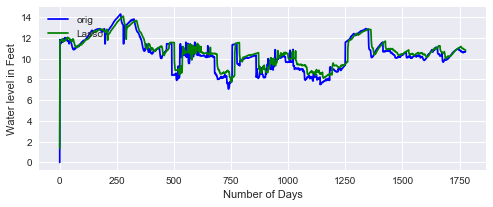

SVM Regression
RMSE SVM =  0.732521588924


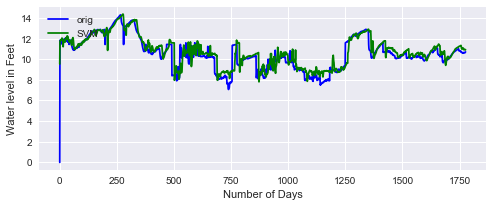

RF Regressor
RMSE RF =  0.774777849938


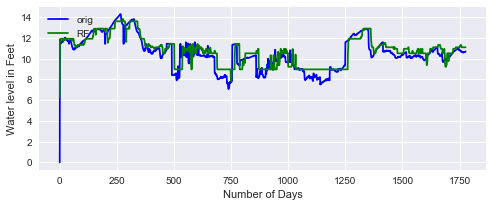

In [486]:
analyzeOneState(18)

State =  indiana
Lasso Regression
RMSE Lasso =  0.636468932616


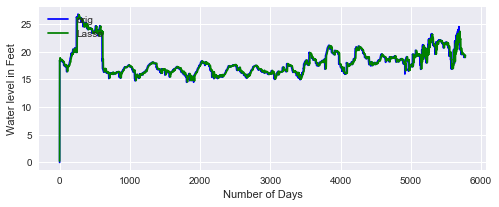

SVM Regression
RMSE SVM =  0.760644915473


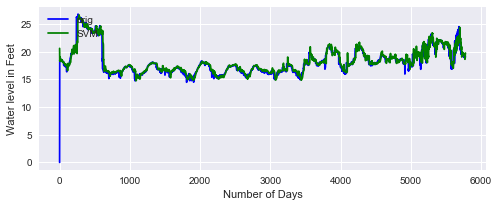

RF Regressor
RMSE RF =  1.06129720981


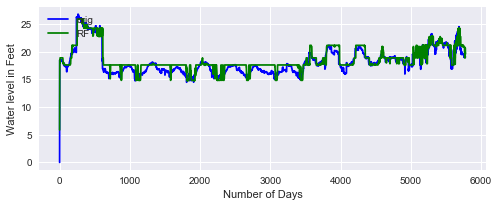

In [487]:
analyzeOneState(19)

State =  arkansas
Lasso Regression
RMSE Lasso =  4.99447415644


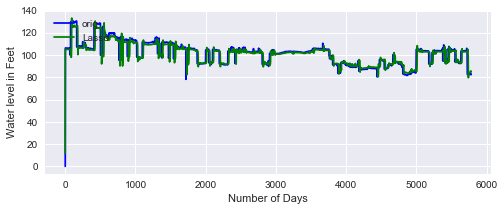

SVM Regression
RMSE SVM =  7.77434022308


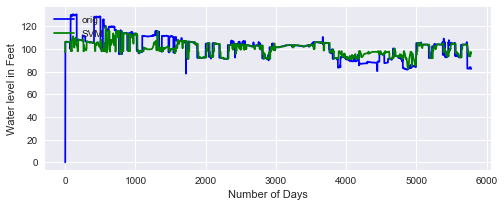

RF Regressor
RMSE RF =  5.64898801438


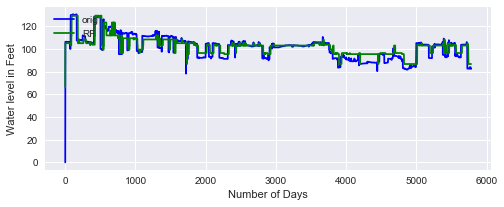

In [488]:
analyzeOneState(20)

State =  iowa
Lasso Regression
RMSE Lasso =  1.21253352353


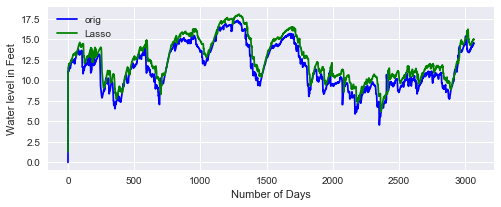

SVM Regression
RMSE SVM =  4.42136713997


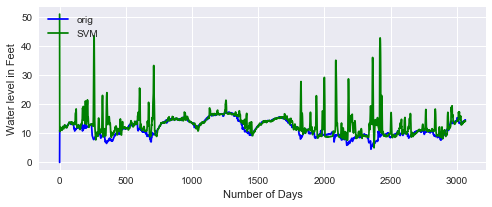

RF Regressor
RMSE RF =  3.60431023625


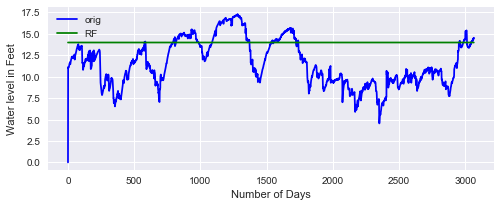

In [489]:
analyzeOneState(21)

State =  new jersey
Lasso Regression
RMSE Lasso =  1.11612424772


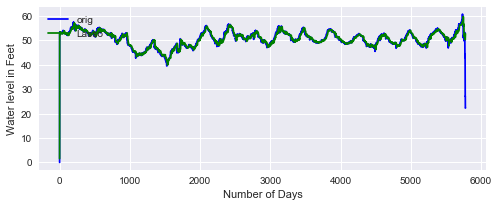

SVM Regression
RMSE SVM =  1.24726631042


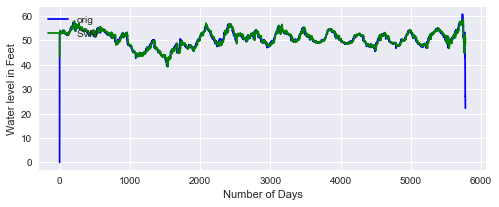

RF Regressor
RMSE RF =  1.39195431428


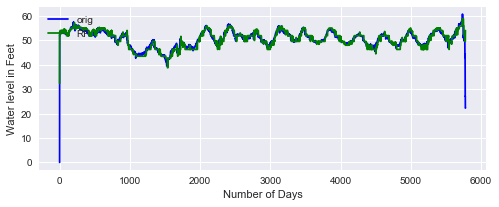

In [490]:
analyzeOneState(22)

State =  wisconsin
Lasso Regression
RMSE Lasso =  2.9792191574


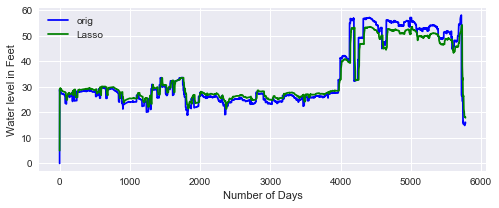

SVM Regression
RMSE SVM =  9.79150747855


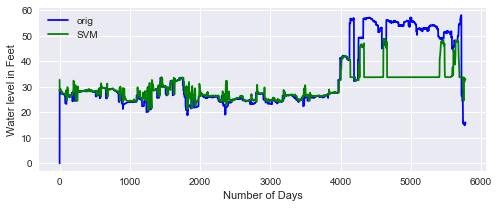

RF Regressor
RMSE RF =  4.01010077522


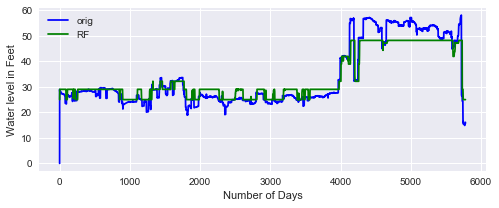

In [491]:
analyzeOneState(23)

State =  michigan
Lasso Regression
RMSE Lasso =  1.12038470732


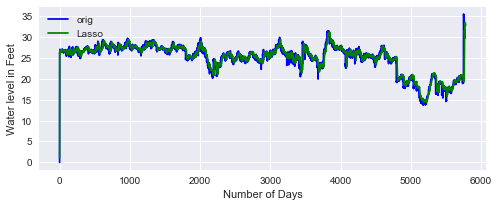

SVM Regression
RMSE SVM =  4.63363056626


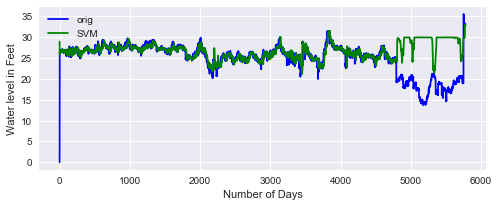

RF Regressor
RMSE RF =  2.5004119912


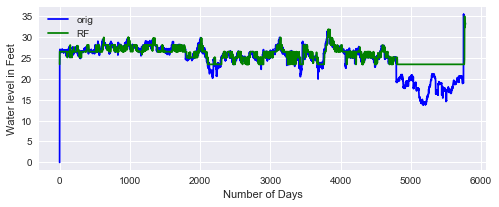

In [492]:
analyzeOneState(24)

State =  arizona
Lasso Regression
RMSE Lasso =  6.92671887909


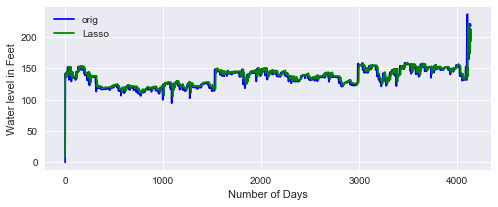

SVM Regression
RMSE SVM =  13.8834491141


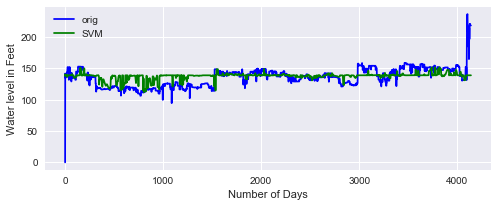

RF Regressor
RMSE RF =  12.0519408653


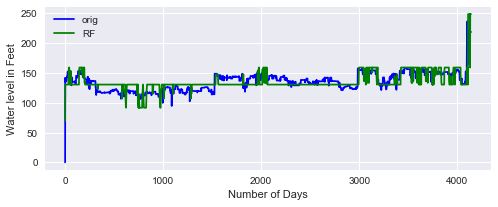

In [493]:
analyzeOneState(25)

State =  montana
Lasso Regression
RMSE Lasso =  3.22530356357


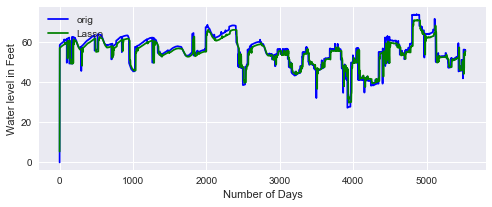

SVM Regression
RMSE SVM =  5.99093124764


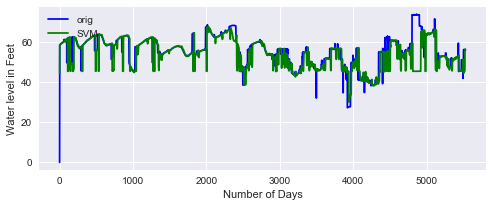

RF Regressor
RMSE RF =  3.93987377051


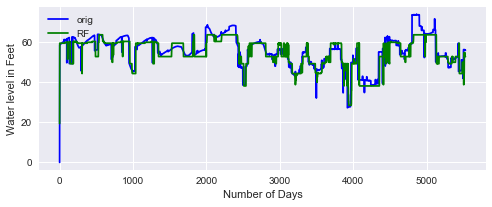

In [494]:
analyzeOneState(26)

State =  new york
Lasso Regression
RMSE Lasso =  0.504535625473


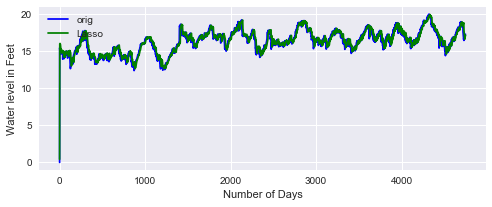

SVM Regression
RMSE SVM =  0.649680106974


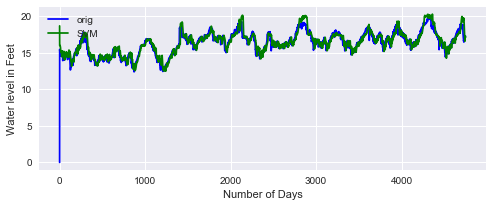

RF Regressor
RMSE RF =  1.15557913018


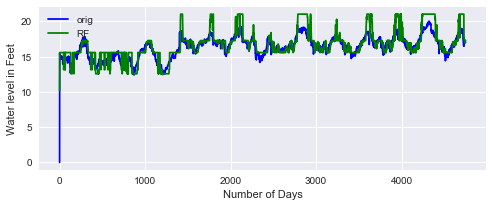

In [495]:
analyzeOneState(27)

State =  wyoming
Lasso Regression
RMSE Lasso =  7.02619714372


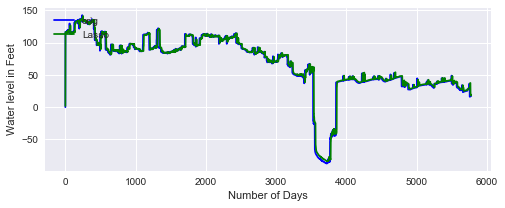

SVM Regression
RMSE SVM =  49.3163549485


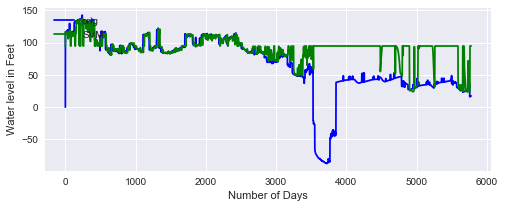

RF Regressor
RMSE RF =  24.8796147672


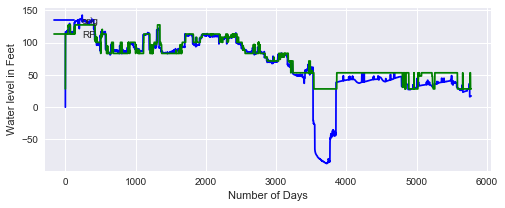

In [496]:
analyzeOneState(28)

State =  puerto rico
Lasso Regression
RMSE Lasso =  0.936578820355


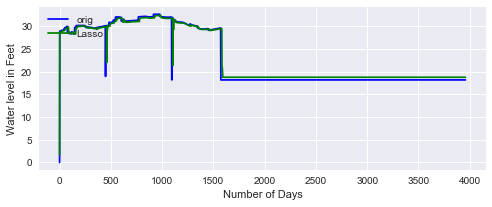

SVM Regression
RMSE SVM =  1.04860984348


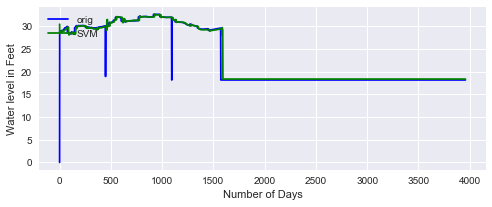

RF Regressor
RMSE RF =  1.22255568639


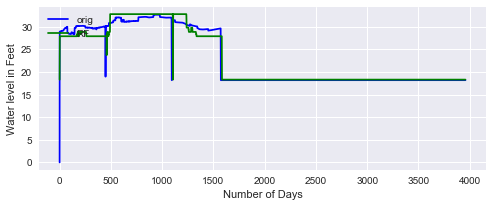

In [497]:
analyzeOneState(29)

State =  minnesota
Lasso Regression
RMSE Lasso =  0.653620890614


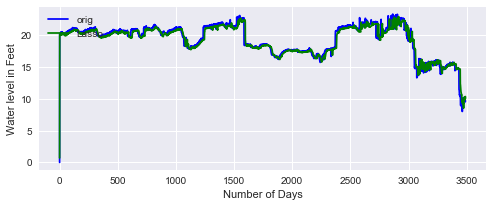

SVM Regression
RMSE SVM =  0.822590335189


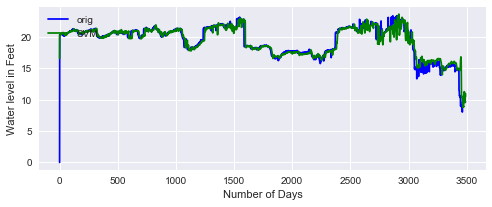

RF Regressor
RMSE RF =  1.48573614558


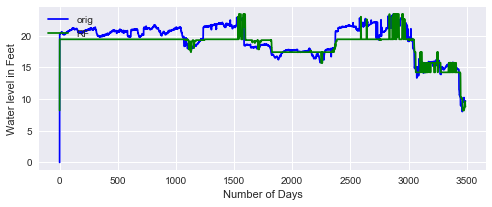

In [498]:
analyzeOneState(30)

State =  north dakota
Lasso Regression
RMSE Lasso =  19.6077520167


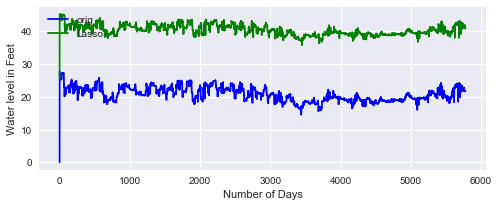

SVM Regression
RMSE SVM =  1.13010953964


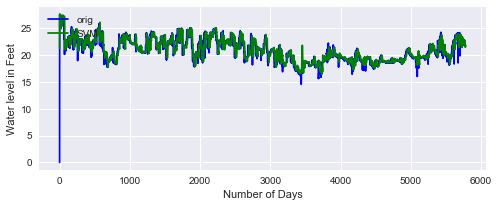

RF Regressor
RMSE RF =  36.6526426885


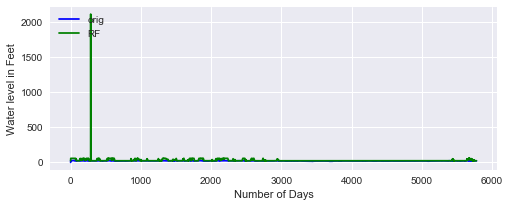

In [499]:
analyzeOneState(31)

State =  florida
Lasso Regression
RMSE Lasso =  5.01653224653


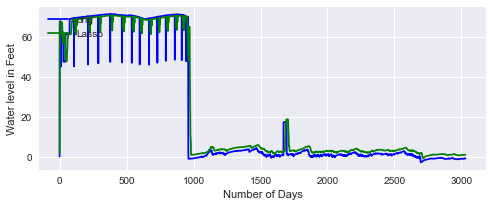

SVM Regression
RMSE SVM =  43.4883676329


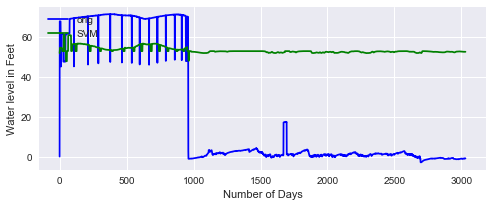

RF Regressor
RMSE RF =  23.414286109


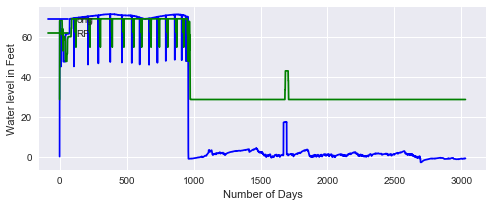

In [500]:
analyzeOneState(32)

State =  massachussets
Lasso Regression
RMSE Lasso =  0.887574305914


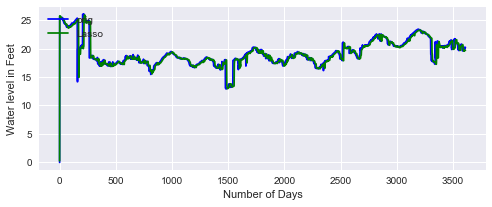

SVM Regression
RMSE SVM =  1.01355007395


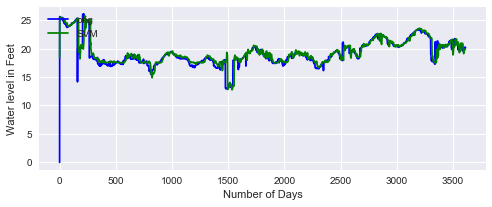

RF Regressor
RMSE RF =  1.31183706944


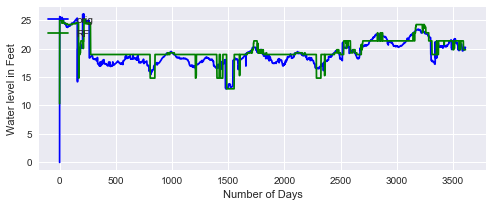

In [501]:
analyzeOneState(33)